### Discrete Cosine Transform

In this notebook we will demonstrate the working principle of the DCT and how it can be employed for image compression.

In [5]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
from scipy.fft import dct, idct

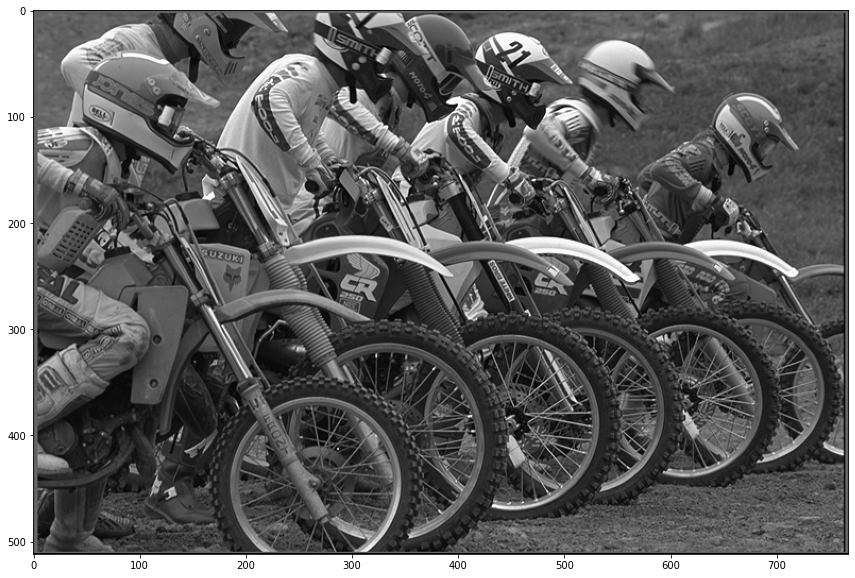

In [6]:
img = cv2.imread('data/kodim05.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape
plt.imshow(img, cmap='gray')

Scipy does not offer 2D DCT implementation but we already know that DCT is a **separable** transform. So the 2D versionw e can easily write ourselves.

In [7]:
def dct2(a):
    return dct(dct(a.T).T)

def idct2(a):
    return idct(idct(a.T).T)

In [10]:
block = np.ones((4, 4), dtype=np.float32)
print(block)
print(' ')
print(dct2(block))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
 
[[64.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [11]:
# Horizontal edge
block = np.zeros((4, 4), dtype=np.float32)
block[0, :] = 1
print(block)
print(' ')
print(dct2(block))

[[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 
[[16.         0.         0.         0.       ]
 [14.782072   0.         0.         0.       ]
 [11.313708   0.         0.         0.       ]
 [ 6.1229343  0.         0.         0.       ]]


In [12]:
# Vertical structure
block = np.zeros((4, 4), dtype=np.float32)
block[:, [1, 2]] = 1
print(block)
print(' ')
print(dct2(block))

[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]]
 
[[ 32.         0.       -22.627417   0.      ]
 [  0.         0.         0.         0.      ]
 [  0.         0.         0.         0.      ]
 [  0.         0.         0.         0.      ]]


#### Block-wise 2D DCT Image Transform

This operation is the fundamental process for JPEG compression.

0.8666127522786459
PSNR 29.513080334826604 dB


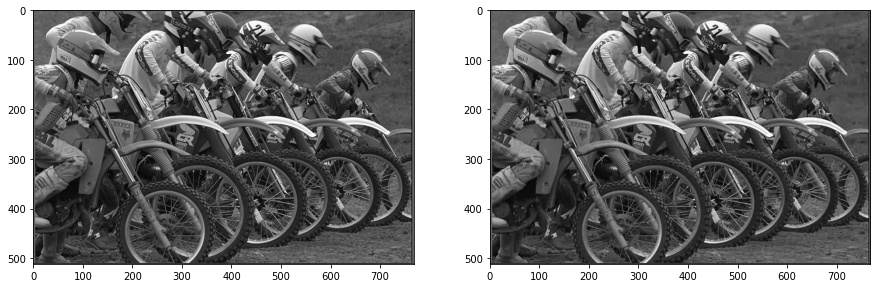

In [30]:
def psnr(ref, target):
    error = ref.astype(np.float32) - target.astype(np.float32)
    mse = np.mean(error**2)
    return 10 * np.log10((255**2)/mse)

# Sampling by thresholding
ratios = []
blk_size = 8
result = np.zeros_like(img, dtype=np.float32)
for r in range(0, rows, blk_size):
    for c in range(0, cols, blk_size):
        block = img[r:r+blk_size, c:c+blk_size].astype(np.float32)
        d = dct2(block/255)
        th = 2
        ratios.append(np.sum((np.abs(d) < th))/blk_size**2)
        
        d[np.abs(d) < th] = 0
        i = idct2(d)
        result[r:r+blk_size, c:c+blk_size] = i
      
result[result < 0] = 0
result[result > 1] = 1
result = (255*result).astype(np.uint8)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(result, cmap='gray')

print(np.mean(ratios))
print('PSNR', psnr(img, result), 'dB')


PSNR 35.71083731991571 dB


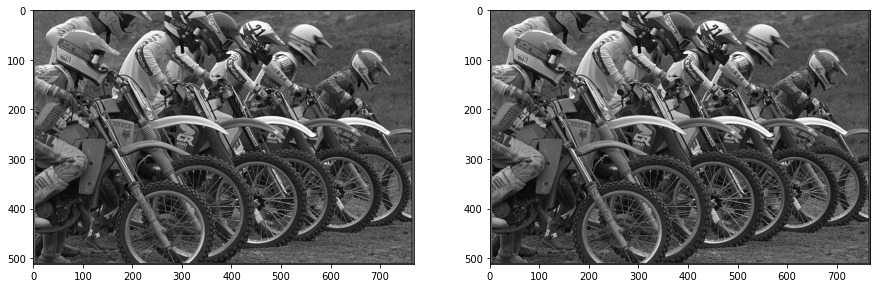

In [34]:
# Zonal sampling
ratios = []
blk_size = 8
result = np.zeros_like(img, dtype=np.float32)
for r in range(0, rows, blk_size):
    for c in range(0, cols, blk_size):
        block = img[r:r+blk_size, c:c+blk_size].astype(np.float32)
        d = dct2(block/255)                
        d[4:, 4:] = 0
        i = idct2(d)
        result[r:r+blk_size, c:c+blk_size] = i
      
result[result < 0] = 0
result[result > 1] = 1
result = (255*result).astype(np.uint8)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(result, cmap='gray')
print('PSNR', psnr(img, result), 'dB')

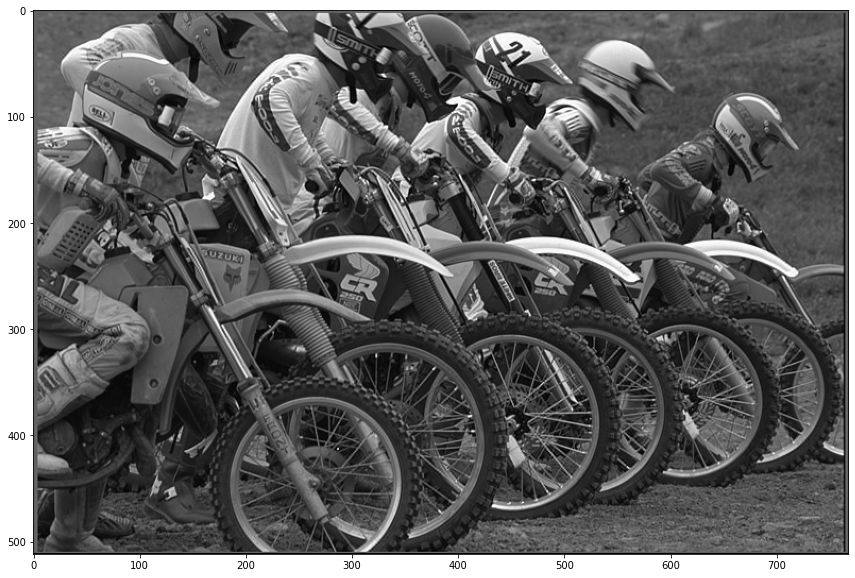

In [35]:
plt.imshow(result, cmap='gray')